In [387]:
import time
import datetime
import pandas as pd

from matplotlib import pyplot as plt

In [388]:
today = date.today().strftime("%d.%m.%Y")
print(today)

07.01.2022


### variablen

In [389]:
# rolling_window1 = 10
# rolling_window2 = 100

aktie = 'LHA.DE'

### YYYY, M, D, h, s
period1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 1, 6, 23, 59).timetuple()))
interval = '1d' # 1d, 1wk, 1m 

print(period1)
print(period2)

1577919540
1641509940


In [390]:
# # dict ticker

# dict_ticker = {
#     1: 'TSLA',
#     2: 'abc'
# }

# for key in dict_ticker:
#     print(key, '->', dict_ticker[key])

In [391]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{aktie}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [392]:
print(query_string)

https://query1.finance.yahoo.com/v7/finance/download/LHA.DE?period1=1577919540&period2=1641509940&interval=1d&events=history&includeAdjustedClose=true


### dataframe

In [393]:
df = pd.read_csv(query_string)

### calculations

In [394]:
df['Kurs'] = (1/2)*( df["Low"]+df["High"] )
df['Kurs_mean_1'] = df['Kurs'].rolling(window=rolling_window1, min_periods=1, center=True).mean()
df['Kurs_mean_2'] = df['Kurs'].rolling(window=rolling_window2, min_periods=1, center=True).mean()

df['Einstandspreis'] = 6.379 

df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close'])
df

,Date,Volume,Kurs,Kurs_mean_1,Kurs_mean_2,Einstandspreis
0,2020-01-02,3644014,16.512500,15.576154,13.069062,6.379
1,2020-01-03,16227652,15.822499,15.507143,12.994385,6.379
2,2020-01-06,6641199,15.262500,15.434833,12.919061,6.379
3,2020-01-07,4169914,15.505000,15.384375,12.845806,6.379
4,2020-01-08,6750636,15.280000,15.334559,12.781147,6.379
...,...,...,...,...,...,...
508,2021-12-30,4155492,6.178500,6.239941,6.076870,6.379
509,2022-01-03,19693885,6.506500,6.258531,6.077956,6.379
510,2022-01-04,22050463,6.933500,6.286900,6.079142,6.379
511,2022-01-05,12036258,7.087000,6.322143,6.077061,6.379


In [395]:
length = len(df["Kurs"])
rolling_window1 = int(length*0.05)
rolling_window2 = int(length*0.25)

print(length)
print(rolling_window1)
print(rolling_window2)

513
25
128


### data cleaning

In [396]:
# from datetime import datetime, timedelta
from datetime import date

df['Date'] = pd.to_datetime(df.Date, utc=True)


### calculations

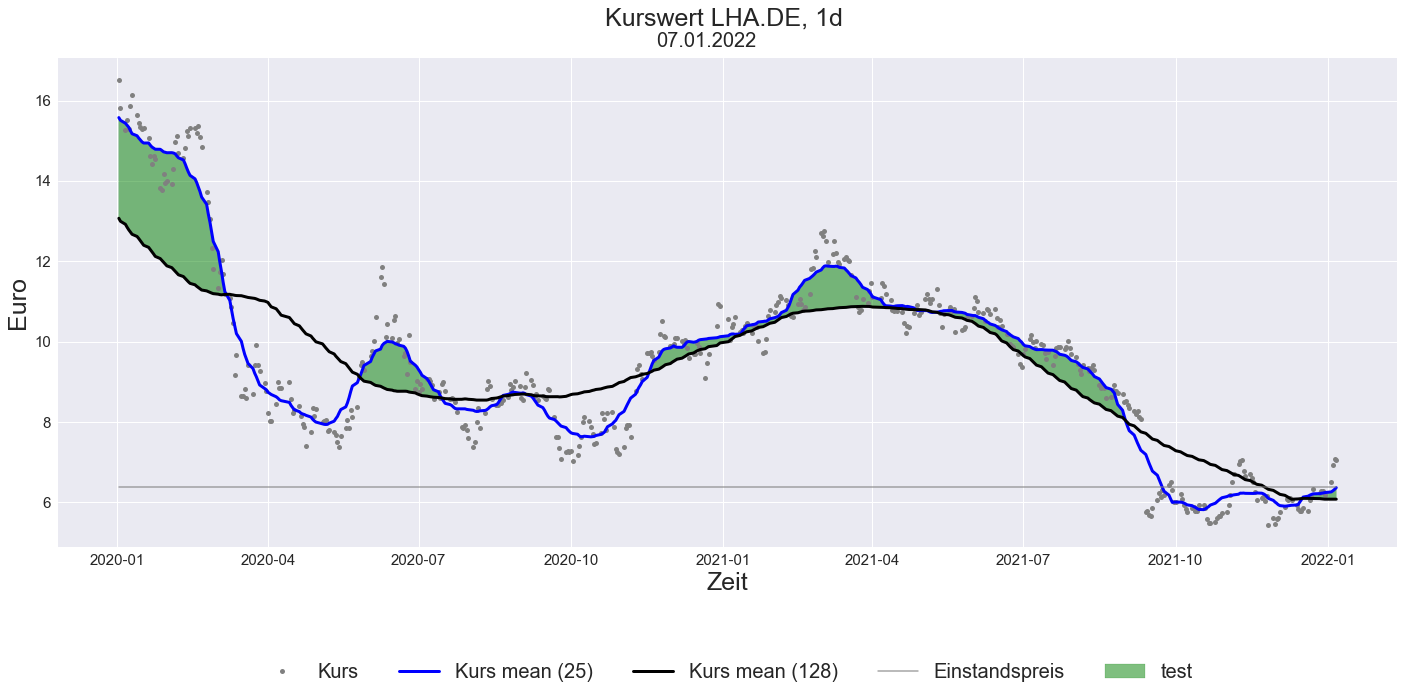

In [397]:
plt.figure(figsize=(24,9))
plt.style.use('seaborn')
plt.grid(True)


plt.plot(df["Date"], df["Kurs"], marker='.', linestyle='',
        color="grey", linewidth=3, label = "Kurs", markersize=10)


plt.plot(df["Date"], df["Kurs_mean_1"], marker='', linestyle='-',
        color="blue", linewidth=3, label = f'Kurs mean ({rolling_window1})', markersize=10)

plt.plot(df["Date"], df["Kurs_mean_2"], marker='', linestyle='-',
        color="black", linewidth=3, label = f'Kurs mean ({rolling_window2})', markersize=10)


plt.fill_between(df["Date"], df["Kurs_mean_1"], df["Kurs_mean_2"], color='green', alpha=0.5,
                 label=f'test',  where = (df["Kurs_mean_1"] > df["Kurs_mean_2"]))

# Einstandspreis
plt.plot(df["Date"], df["Einstandspreis"], marker='', linestyle='-', alpha = 0.7,
        color="grey", linewidth=1.5, label = f'Einstandspreis', markersize=10)


# Legende
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=5,
           fontsize=20)

# Titel
plt.title(f'Kurswert {aktie}, ({interval} \n', fontsize=25)
plt.suptitle(f'{today}', fontsize=20, y=0.92)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)

plt.ylabel("Euro", fontsize=25)
plt.xlabel("Zeit", fontsize=25)


plt.savefig(f'D:\\Github\\Aktien\\Output\\{aktie}.png', dpi=200, bbox_inches='tight')